In [1]:
#Note: The Program requires to install Sklearn, Matplotlib and Fast_ml packages
#If you do not have the package, please run the following command in your Python
#terminal to install the required packages.

This portion loads the Hacking Data Set into the Dataframe for processing before begining the supervised machine learning.

In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
@author: Kelvin Chua
@dataset: Self Generated Hacking Tools PCAPs
"""
import pandas as pd
import numpy as np

# Load ML Pkgs
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from fast_ml.model_development import train_valid_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Load the dataset
bigdataset = pd.read_csv('Datasets\hackingdataset98.csv' ,index_col=None,sep= ',')

print('Dataset for Machine Learning Loaded')

postdata = bigdataset[['Time','Source','Destination','Protocol','Length','MSS',
                       'WIN','TTL','URG','ACK','PSH','RST','SYN','FIN','SQ','SQR',
                       'Who','At','Src Port', 'Dest Port']]



#One Hot Encoding for the labels of the attack types to get better accuracy
bigdatasetAns = pd.get_dummies(bigdataset.AttackType)

results_df = pd.DataFrame()

featurelen = 20 # number of columns

label_encoder = LabelEncoder()
for i in range(0, featurelen-3):  # minus numerical values
    postdata.iloc[:,i] = label_encoder.fit_transform(postdata.iloc[:,i])

#Saved the processed Dataset into a file for later use if needed    
postdata.join(bigdatasetAns).to_csv('Datasets\df99.csv', sep=',',index=False,encoding='utf-8-sig')


Dataset for Machine Learning Loaded


The portion below splits the dataset for training and testing. It includes Cross Validation. The program will try out the different supervised learning models like Random Forest Train , K Nearest Neighbour Classifier Train, Decision Tree and SVC models. Their cross validation accuracy scores will be computed.

Random Forest basic accuracy score: 0.7465418174079591
Performing Cross Validation now...
Cross validation accuracy score for Random Forest Classifier: 0.72 (+/- 0.06)

K-nearest neighbors classifier basic accuracy score: 0.9789316875931049
Performing Cross Validation now...
Cross validation accuracy score for K-Nearest Neighbors Classifier: 0.98 (+/- 0.00)

Decision Tree basic accuracy score: 0.9793573100659715
Performing Cross Validation now...
Cross validation accuracy score for Decision Tree Classifier: 0.98 (+/- 0.00)



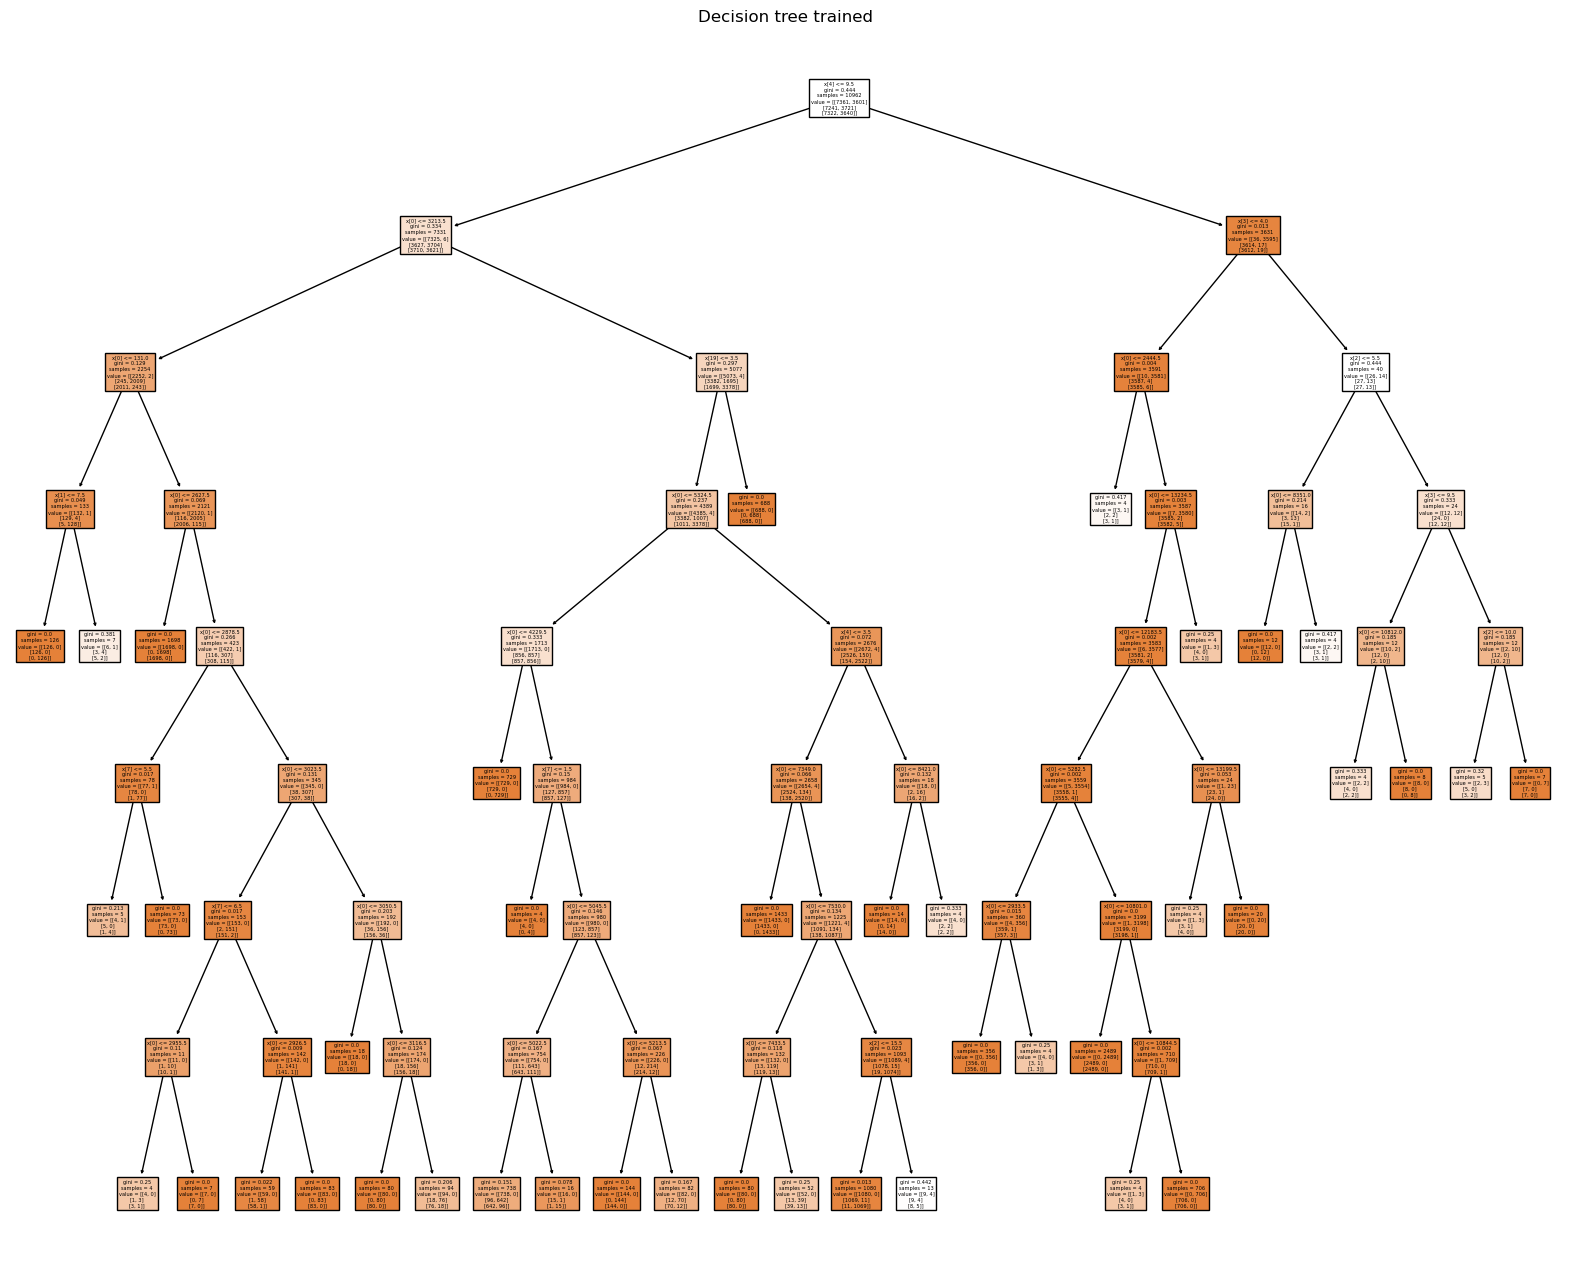

Model report for Decision Tree: 
               precision    recall  f1-score   support

    hostscan       1.00      1.00      1.00      1522
      osscan       0.96      0.99      0.98      1679
    portscan       0.99      0.95      0.97      1498

   micro avg       0.98      0.98      0.98      4699
   macro avg       0.98      0.98      0.98      4699
weighted avg       0.98      0.98      0.98      4699
 samples avg       0.98      0.98      0.98      4699

Support Vector Machine basic accuracy score: 0.691636518408172
Performing Cross Validation now...
Cross validation accuracy score for Support Vector Machine Classifier: 0.69 (+/- 0.01)

Comparing the Cross Validation Accuracy of all models:
Decision Tree model is chosen as it projected the best cross validation accuracy with minimum variation.


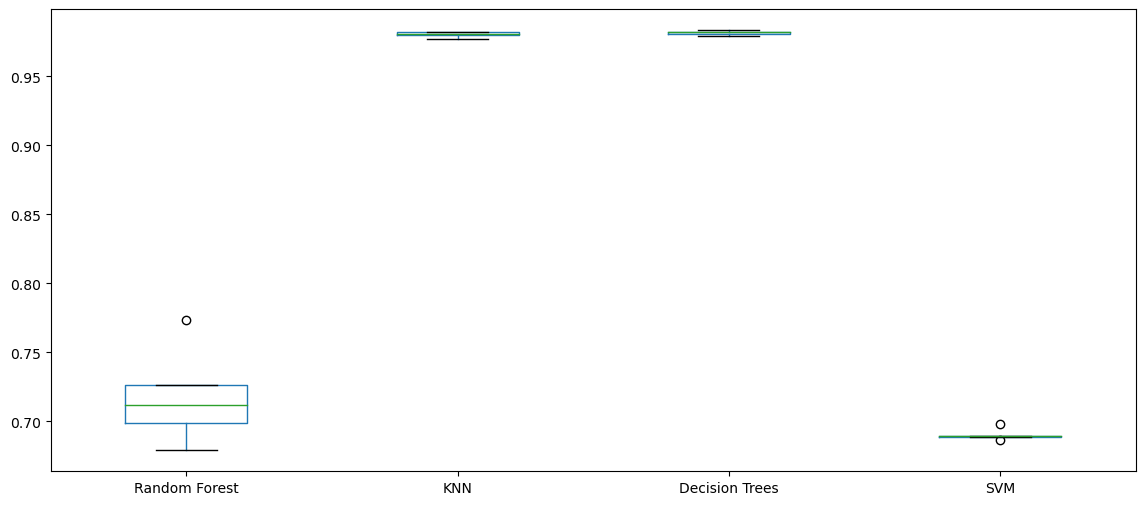

In [3]:

# Split the dataset for learning and testing
x_train, x_test, Y_train, Y_test = train_test_split (postdata,bigdatasetAns, test_size = .3)

# Setting up the KFold for Cross Validation later
# It will do 5 random tests
kf = KFold(n_splits=5, shuffle=True, random_state=10)

# The program will then perform 4 types of Supervised Machine Learning
# The one with the best cross validation with little deviation will be chosen for
# final evauation to determine the type of hacking activity.

# Random Forest Train model
clf_rf = RandomForestClassifier(max_depth=2, random_state=0)
clf_rf.fit(x_train, Y_train) 

Y_pred = clf_rf.predict(x_test)

# Show results
print("Random Forest basic accuracy score: " + str(accuracy_score(Y_test, Y_pred)))

print('Performing Cross Validation now...')
model = RandomForestClassifier(max_depth=2, random_state=0)
scores = cross_val_score(model, postdata, bigdatasetAns, cv=kf)
results_df['Random Forest'] = scores
print("Cross validation accuracy score for Random Forest Classifier: %0.2f (+/- %0.2f)\n" % (scores.mean(), scores.std() * 2))

# K Nearest Neighbour Classifier Train model
k = 5
model = KNeighborsClassifier(n_neighbors=k)
kmodel = KNeighborsClassifier(n_neighbors=k)
kmodel.fit(x_train, Y_train)
Y_pred = kmodel.predict(x_test)
# Show results
print("K-nearest neighbors classifier basic accuracy score: " + str(accuracy_score(Y_test, Y_pred)))
print('Performing Cross Validation now...')
model = KNeighborsClassifier(n_neighbors=k)
scores = cross_val_score(model, postdata, bigdatasetAns, cv=kf)
results_df['KNN'] = scores
print("Cross validation accuracy score for K-Nearest Neighbors Classifier: %0.2f (+/- %0.2f)\n" % (scores.mean(), scores.std() * 2))

# Decision Tree Train model
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, 
                               max_depth=8, min_samples_leaf=4)
clf_gini.fit(x_train, Y_train) 

Y_pred = clf_gini.predict(x_test)
print("Decision Tree basic accuracy score: " + str(accuracy_score(Y_test, Y_pred)))
print('Performing Cross Validation now...')
model = DecisionTreeClassifier(criterion = "gini", random_state = 100, 
                               max_depth=8, min_samples_leaf=4)
scores = cross_val_score(model, postdata, bigdatasetAns, cv=kf)
results_df['Decision Trees'] = scores
print("Cross validation accuracy score for Decision Tree Classifier: %0.2f (+/- %0.2f)\n" % (scores.mean(), scores.std() * 2))

plt.figure(figsize=(20,16))
plot_tree(clf_gini, filled=True)
plt.title("Decision tree trained")
plt.show()

#Model Report for Decision Tree
target_names = ['hostscan','osscan','portscan']
model_report = classification_report(Y_test, Y_pred,target_names=target_names)
print("Model report for Decision Tree: \n", model_report)

#Converts the labels to 1 dimensio number array for machine learning
#SVC cannot process the one hot encoded labels. Thus, it must be coverted 
#To 1 column label. In this case, 0 represents hostscan, 1 represent osscan and 2 represent portscan.
bigans2 = []
for i in bigdataset.AttackType:
    dx = 0
    if (i == 'osscan'):
        dx=1
    elif (i == 'portscan'):
        dx=2
    bigans2.append(dx)

x_train, x_test, Y1_train, Y1_test = train_test_split (postdata,bigans2, test_size = .3)
print('Warning: Support Vector Machine will take along time. Please wait...')
Smodel = SVC()
Smodel.fit(x_train, Y1_train)
xscore = Smodel.score(x_test, Y1_test)
print("Support Vector Machine basic accuracy score: " + str(xscore))

print('Performing Cross Validation now...')
model = SVC()
scores = cross_val_score(model, postdata, bigans2, cv=kf)
results_df['SVM'] = scores
print("Cross validation accuracy score for Support Vector Machine Classifier: %0.2f (+/- %0.2f)\n" % (scores.mean(), scores.std() * 2))

print("Comparing the Cross Validation Accuracy of all models:")
results_df.boxplot(figsize=(14,6), grid=False)

print('Decision Tree model is chosen as it projected the best cross validation accuracy with minimum variation.')



Decision Tree model is chosen as it projected the best cross validation accuracy with minimum variation. Next, we will load the sample5.pcap dataset, which contains the forensics data unknown to us. The type of hacking activity could be either 'hostscan', 'osscan' or 'portscan'. The program will attempt to predict the hacking activity.


Loading the new combined dataset with sample5.pcap data.

Learning and Predicting the combined dataset
Decision Tree basic accuracy score: 0.980119709277469
Cross validation accuracy score for Decision Tree Classifier: 0.98 (+/- 0.00)



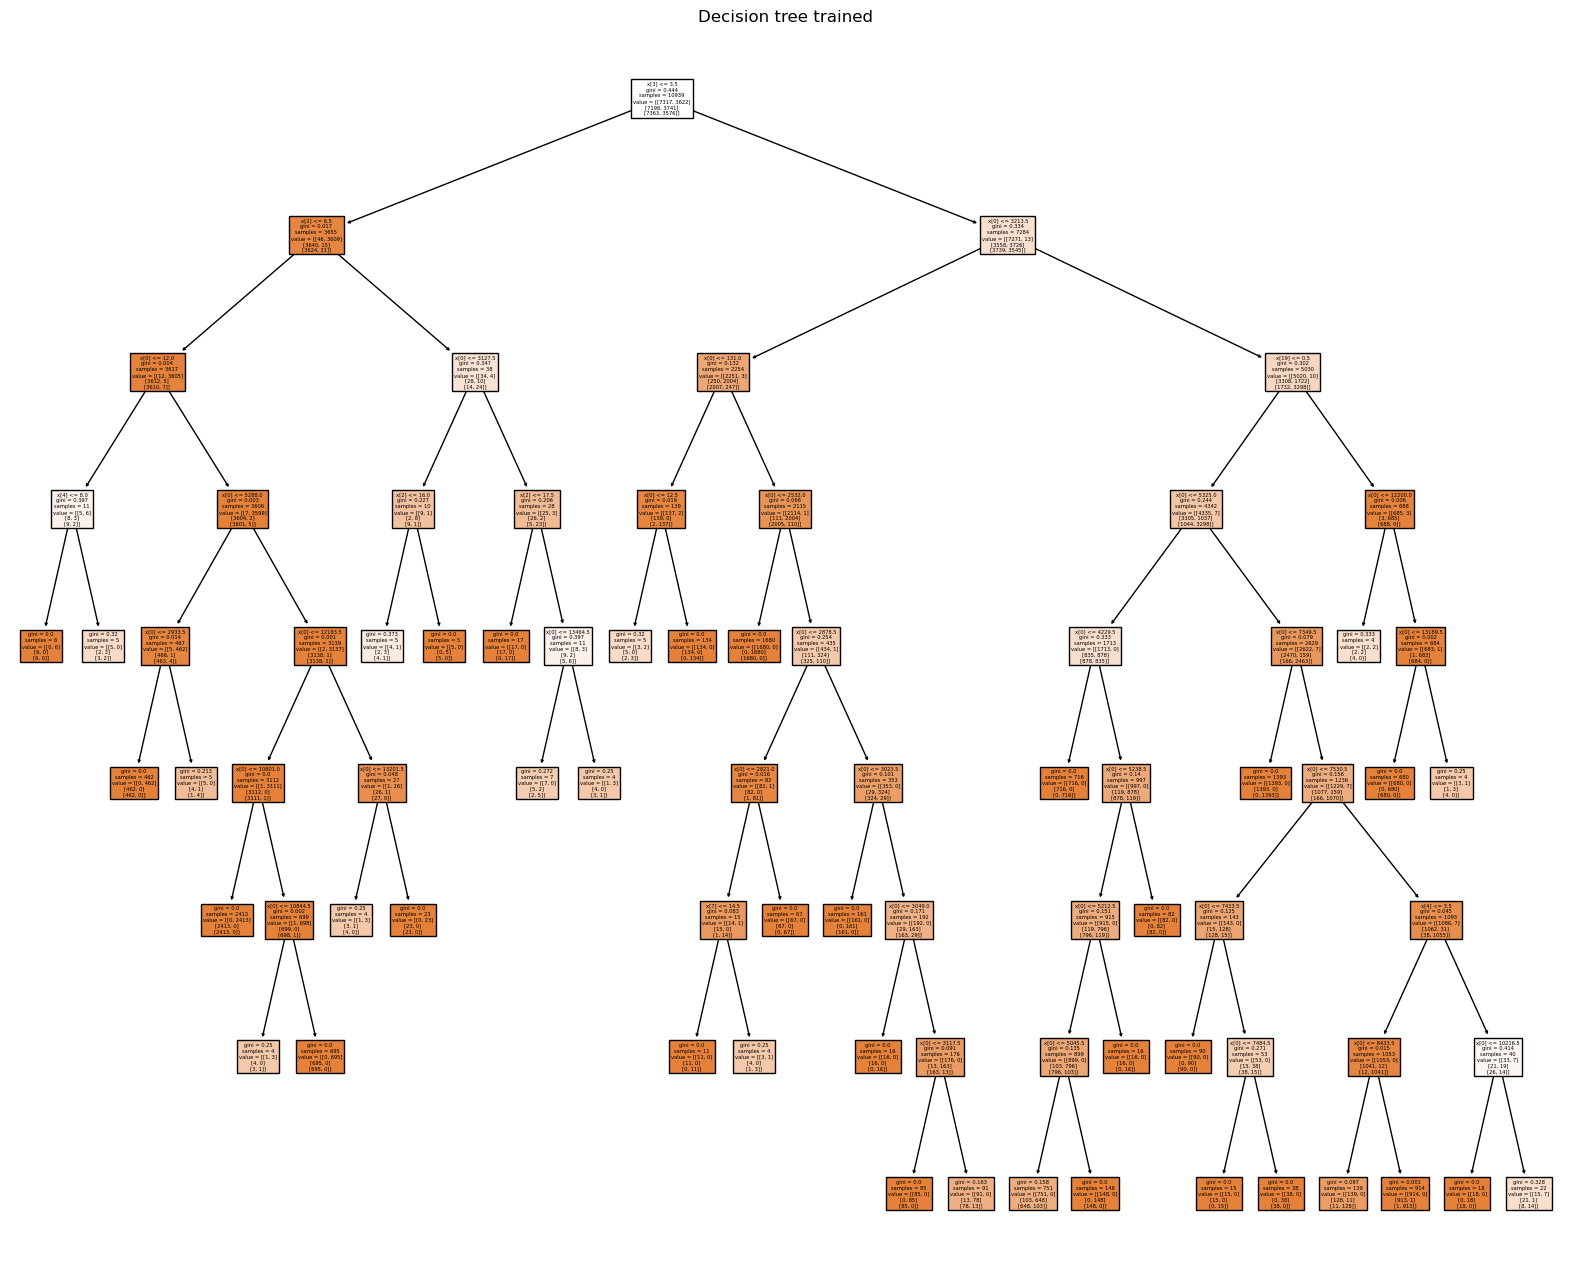

Model report for the Combined Dataset: 
               precision    recall  f1-score   support

    hostscan       1.00      0.99      1.00      1620
      osscan       0.95      0.99      0.97      1575
    portscan       0.99      0.95      0.97      1483

   micro avg       0.98      0.98      0.98      4678
   macro avg       0.98      0.98      0.98      4678
weighted avg       0.98      0.98      0.98      4678
 samples avg       0.98      0.98      0.98      4678

Overall, the machine predicted this sample5.pcap to be mainly osscan activity.


In [4]:
#Plotting Decision Tree Graph
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, 
                               max_depth=8, min_samples_leaf=4)
clf_gini.fit(x_train, Y_train) 
Y_pred = clf_gini.predict(x_test)


#Loading the Processed Sample5.pcap dataset
ztestset = pd.read_csv('Datasets\sample5.csv',index_col=None,sep= ',')

#The sample5.pcap dataset will be combined with the previous dataset for combined machine learning
# and prediction.

a = np.zeros(shape=(194,3),dtype=int)
zans = pd.DataFrame(a,columns=['hostscan','osscan','portscan'])
zans.reset_index(drop=True, inplace=True)

# The key features are extracted and encoded for machine learning
zdata = ztestset[['Time','Source','Destination','Protocol','Length','MSS','WIN','TTL','URG','ACK','PSH','RST','SYN','FIN','SQ','SQR','Who','At','Src Port', 'Dest Port']]
zdata = zdata.fillna(0)
for i in range(0, featurelen-3):  # minus numerical values
    zdata.iloc[:,i] = label_encoder.fit_transform(zdata.iloc[:,i])

#The encoded dataset is stored for later use if needed.
zdata.join(zans).to_csv('Datasets\dfz99.csv', sep=',',index=False,encoding='utf-8-sig')

#The newdf and zframe are the new combined datasets that puts together the original
#dataset generated with sample5.pcap. As sample5 is unlabelled, 0s were preloaded 
#into the dataframe but it would not be used for machine learning. Instead,
#its features will be used for predictions instead.
newdf = pd.concat([postdata,zdata], axis=0)
zframe = pd.concat([bigdatasetAns,zans], axis=0)
zframe.reset_index(drop=True, inplace=True)

print('\nLoading the new combined dataset with sample5.pcap data.\n')

#df4 is combination
df4 = newdf.join(zframe)

# This code splits the whole df4 into 3 sets, 1 for training, 1 for validating and
# 1 for prediction
print('Learning and Predicting the combined dataset')
x_train, Y_train, x_valid, Y_valid, x_test, Y_test = train_valid_test_split (df4,target = ['hostscan','osscan','portscan'], 
                                                                             train_size=0.69, valid_size=0.295,test_size =0.015)
# Decision Tree Train model
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, 
                               max_depth=8, min_samples_leaf=4)
clf_gini.fit(x_train, Y_train) 

Y_pred = clf_gini.predict(x_valid)
print("Decision Tree basic accuracy score: " + str(accuracy_score(Y_valid, Y_pred)))

model = DecisionTreeClassifier(criterion = "gini", random_state = 100, 
                               max_depth=8, min_samples_leaf=4)
#loads the whole original dataset for cross validation
scores = cross_val_score(model, postdata, bigdatasetAns, cv=kf)
results_df['Decision Trees'] = scores
print("Cross validation accuracy score for Decision Tree Classifier: %0.2f (+/- %0.2f)\n" % (scores.mean(), scores.std() * 2))

plt.figure(figsize=(20,16))
plot_tree(clf_gini, filled=True)
plt.title("Decision tree trained")
plt.show()

#Model Report for the Combined Dataset
model_report = classification_report(Y_valid, Y_pred,target_names=target_names)
print("Model report for the Combined Dataset: \n", model_report)

#Predicted Values 
Y2_pred = clf_gini.predict(x_test)

#The predicted result is extracted and mapped back to the columns
dfpred = pd.DataFrame(Y2_pred[-194:], columns = ['hostscan','osscan','portscan'])

# The predictions are analysed and compared to see which is the most likely hacking activity.
finalans = dfpred.sum()
alist=finalans.to_dict()
max_value = max(alist, key=alist.get)
print("Overall, the machine predicted this sample5.pcap to be mainly", max_value,"activity.")